# Note of Lab 2
By Yurii Voieividka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 


warnings.filterwarnings('ignore')

In [2]:
#X = pd.read_csv('./sample_submission.csv')
train_raw = pd.read_csv('./train.csv')
train_raw.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(train_raw.shape) 

(42000, 785)


In [4]:
y_train = train_raw['label']
x_train = train_raw.drop(labels=['label'], axis=1)
print(y_train.head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

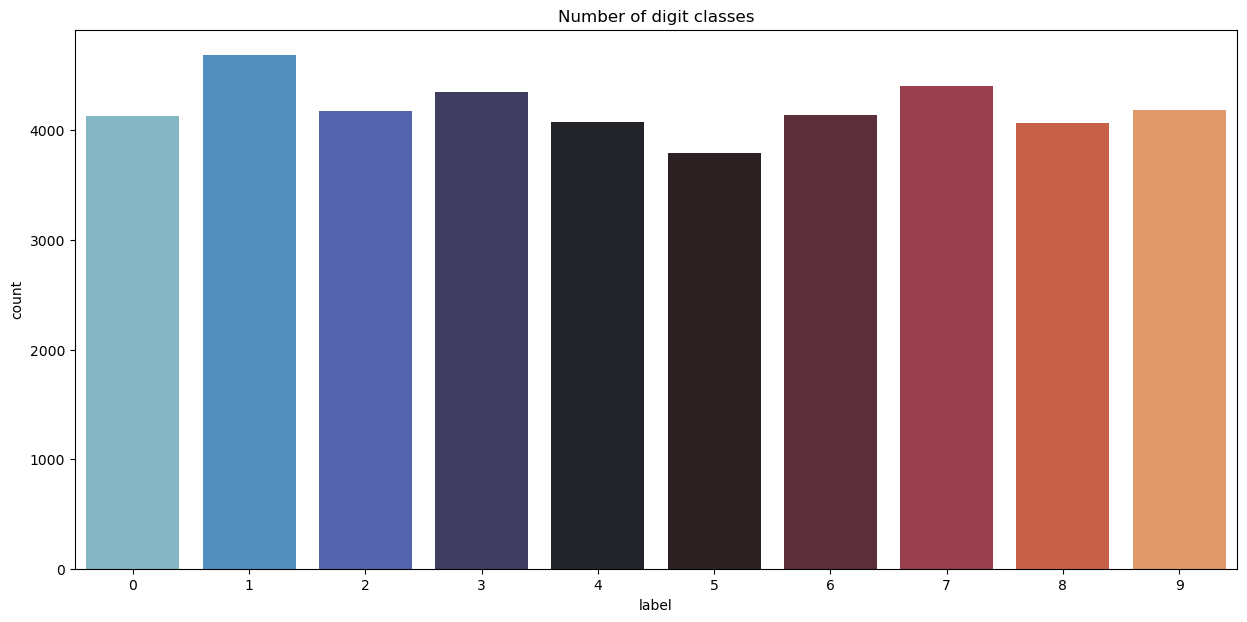

In [5]:
plt.figure(figsize=(15,7)) 
g = sns.countplot(x=y_train, palette="icefire") 
plt.title("Number of digit classes") 
y_train.value_counts()

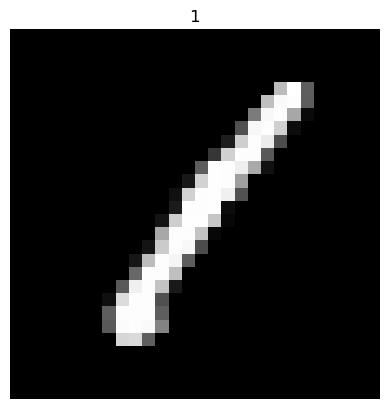

In [6]:
img = x_train.iloc[0].to_numpy()

img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_raw.iloc[0,0])
plt.axis("off")
plt.show()

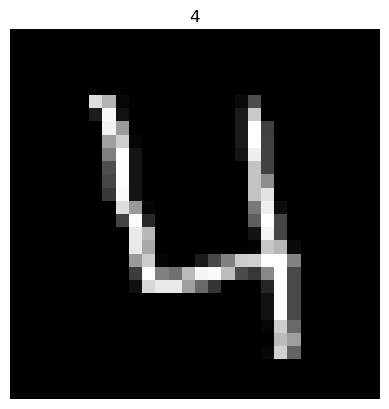

In [7]:
img = x_train.iloc[3].to_numpy()
img = img.reshape((28,28))

plt.imshow(img, cmap='gray')
plt.title(train_raw.iloc[3,0])
plt.axis("off")
plt.show()

## Noramlization and Reshaping

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
print(y_train.shape)

(42000,)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

In [11]:
#Normilize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (31500, 784)
x_test shape: (10500, 784)


In [12]:
#Split the train and validation set
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [13]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)


In [14]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [15]:
#Convolutional Neural Network 

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size =0.1, random_state=2)
print("x_train shape",x_train.shape)

x_train shape (28350, 28, 28, 1)


In [17]:
print("x_train shape",x_train.shape) 
print("x_test shape",x_val.shape) 
print("y_train shape",y_train.shape) 
print("y_test shape",y_val.shape) 


x_train shape (28350, 28, 28, 1)
x_test shape (3150, 28, 28, 1)
y_train shape (28350, 10)
y_test shape (3150, 10)


In [18]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential([
    Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

2022-10-28 00:14:18.952574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [20]:
#Compile
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
epochs = 10
batch_size = 250

In [22]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.5,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=False,
    vertical_flip=False)

In [23]:
datagen.fit(x_train)

In [24]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
113/113 [==============================] - 8s 67ms/step - loss: 2.2445 - accuracy: 0.1580 - val_loss: 1.9292 - val_accuracy: 0.2876
Epoch 2/10
113/113 [==============================] - 5s 43ms/step - loss: 2.0158 - accuracy: 0.2681 - val_loss: 1.4923 - val_accuracy: 0.5451
Epoch 3/10
113/113 [==============================] - 5s 40ms/step - loss: 1.8204 - accuracy: 0.3559 - val_loss: 1.0440 - val_accuracy: 0.7825
Epoch 4/10
113/113 [==============================] - 5s 40ms/step - loss: 1.6823 - accuracy: 0.4122 - val_loss: 0.7462 - val_accuracy: 0.8244
Epoch 5/10
113/113 [==============================] - 5s 41ms/step - loss: 1.5885 - accuracy: 0.4517 - val_loss: 0.5770 - val_accuracy: 0.8752
Epoch 6/10
113/113 [==============================] - 5s 40ms/step - loss: 1.5245 - accuracy: 0.4756 - val_loss: 0.4757 - val_accuracy: 0.8949
Epoch 7/10
113/113 [==============================] - 5s 41ms/step - loss: 1.4673 - accuracy: 0.4911 - val_loss: 0.4469 - val_accuracy: 0.8870

<AxesSubplot:title={'center':'Adam'}>

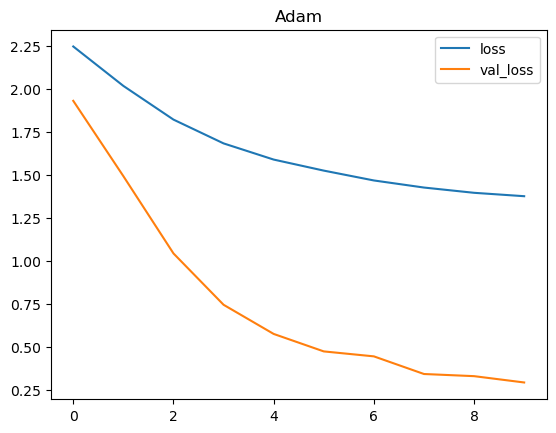

In [25]:
# plt.plot(history.history['val_loss'], color='b', label="validation loss")
# plt.title("Test Loss")
# plt.xlabel("Number of Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot(title="Adam")


In [26]:
import seaborn as sns


In [27]:
y_pred = model.predict(x_val)

99/99 [==============================] - 0s 2ms/step


In [28]:
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

In [29]:
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val, axis = 1)

In [30]:
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

<AxesSubplot:>

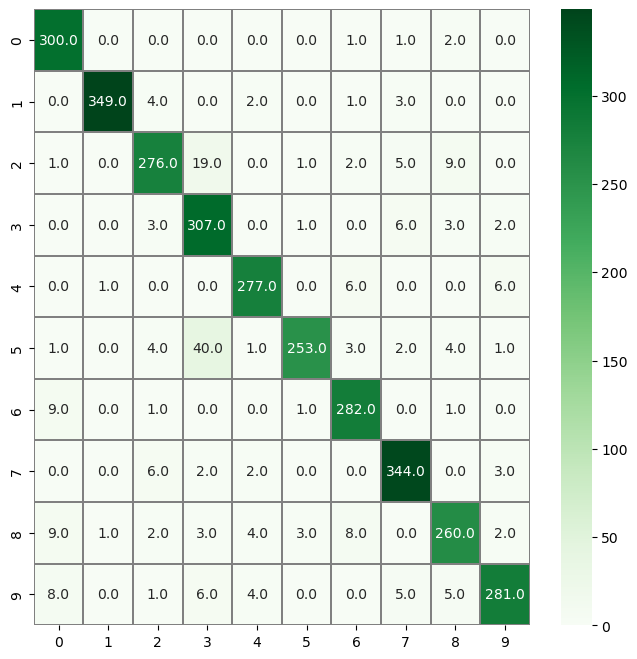

In [31]:
# Plot the confusion matrix
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f',ax=ax)

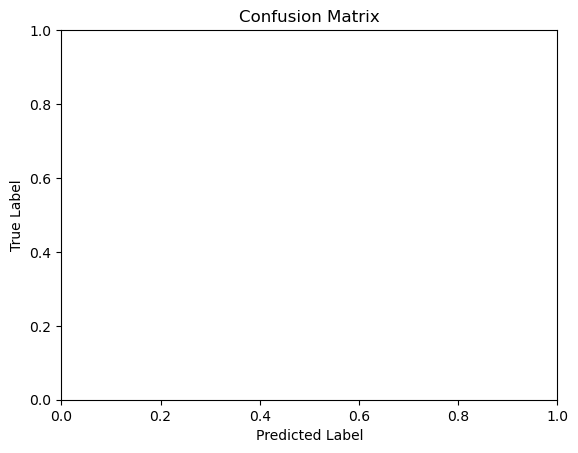

In [32]:
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()